In [ ]:
from LogicalQ.Logical import LogicalStatevector

from qiskit import QuantumCircuit
from LogicalQ.Library.QECCs import steane_code
from LogicalQ.Logical import LogicalCircuit
from LogicalQ.Experiments import execute_circuits
from LogicalQ.Logical import LogicalStatevector

from qiskit_aer import AerSimulator

# Generates the circuit
pqc = QuantumCircuit(1)
pqc.t(0)
lqcirc = LogicalCircuit.from_physical_circuit(pqc, **steane_code)

shots = 32
simulator = AerSimulator()

lqcirc.encode(0, max_iterations=1, initial_states=[1])

# Adds QEC cycle and measurement
#lqcirc.append_qec_cycle([0, 1])
#lqcirc.measure([0], [0])
lqcirc.measure_all()

# Simulates the QEC cycle
result = execute_circuits(lqcirc, backend=simulator, shots=shots, memory=True)[0]
counts = result.get_counts(lqcirc)



statevec = LogicalStatevector.from_counts(counts, 1, **steane_code)
statevec

0j |0>_L + (0.9622377583495961+0j) |1>_L + (0.03776224165040387+0j) |psi_L^perp>


In [ ]:
logical_statevec = LogicalStatevector(lqcirc, n_logical_qubits=1, )

In [ ]:
def tomography(lqcirc: LogicalCircuit):
    lqcirc_z = lqcirc.copy()
    lqcirc_x = lqcirc.copy()
    
    

In [7]:
statevec

(0.1605110759950062+0j) |0>_L + (0.3267257374655814+0j) |1>_L + (0.6359759444219343+0j) |psi_L^perp>


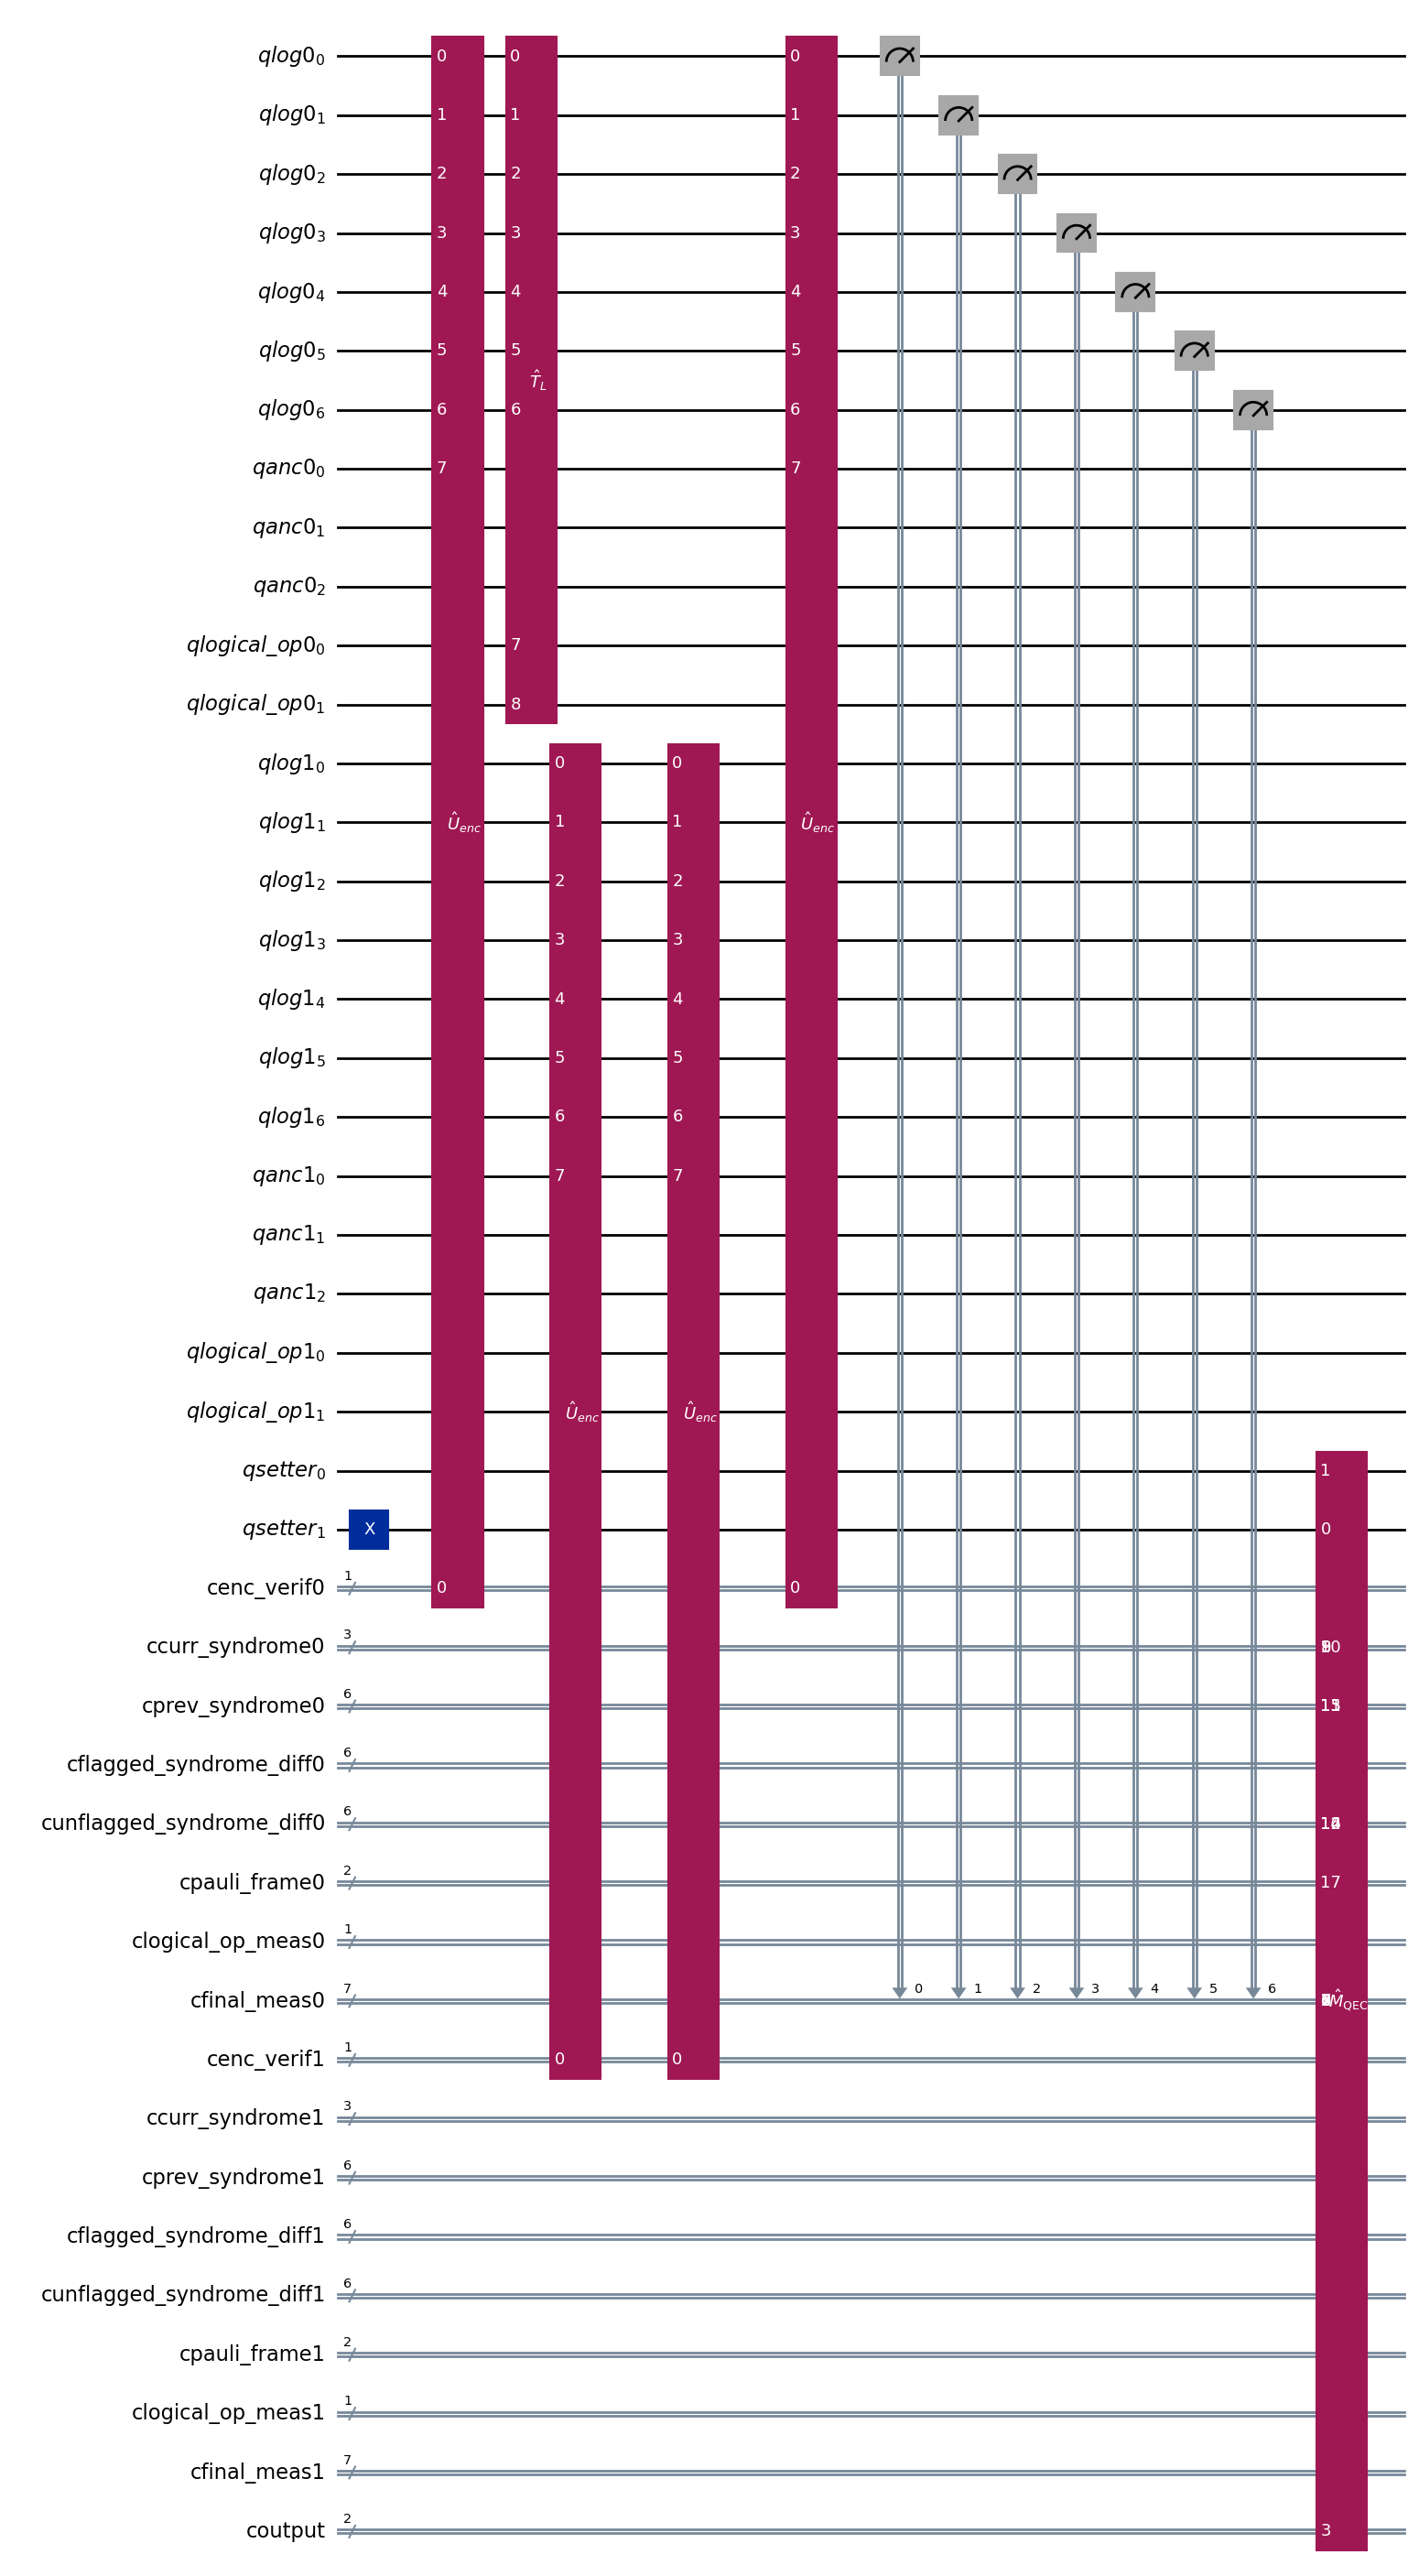

In [3]:
lqcirc.draw(output="mpl")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from LogicalQ.Library.QECCs import phase_flip_code
from LogicalQ.Experiments import execute_circuits
from LogicalQ.Logical import LogicalCircuit
from LogicalQ.Analysis import counts_to_statevector

%load_ext autoreload
%autoreload 2

## Work

In [ ]:
T_gate = np.array([[1, 0], [0, np.exp(np.pi/4 * 1j)]])
init_state = np.array([0, 0]).T

final_state = T_gate @ init_state
final_state

In [ ]:
# Creating a Quantum Register with 1 Qubit
qr = QuantumRegister(1)

# Creating a Quantum Circuit
circuit = QuantumCircuit(qr)

# Applying T Gate on the first Qubit
circuit.t(0)

# Drawing the Quantum Circuit
circuit.draw()

In [ ]:
no_correction_code = lambda n_qubits : {
    "label": (n_qubits, n_qubits, 0),
    "stabilizer_tableau": [
        (1 * n_qubits) * "I"
    ] * 2 * n_qubits
}

In [ ]:
no_correction_code = lambda n_qubits : {
    "label": (n_qubits, n_qubits, 0),
    "stabilizer_tableau": []
}

code = no_correction_code(1)

lqc = LogicalCircuit(1, **code)
lqc.draw("mpl")

In [6]:
# Runs a shot on a noiseless simulator with an error at each of the physical qubits

shots = 32
simulator = AerSimulator()

# Generates the circuit
pqc = QuantumCircuit(1)
pqc.t(0)
pqc.draw(output="mpl")
pqc.num_qubits

1

In [7]:
lqcirc = LogicalCircuit.from_physical_circuit(pqc, **phase_flip_code)
lqcirc.draw(output="mpl")

IndexError: index out of range

In [ ]:
lqcirc.encode(0, max_iterations=1, initial_states=[0])

# Adds QEC cycle and measurement
#lqcirc.append_qec_cycle([0, 1])
#lqcirc.measure([0, 1], [0, 1])
lqcirc.measure_all()

# Simulates the QEC cycle
result = execute_circuits(lqcirc, backend=simulator, shots=shots, memory=True)[0]
counts = result.get_counts(lqcirc)
    
# Outputs should all be 10 if the error correction worked properly
#statevector = counts_to_statevector(counts)

In [14]:
from LogicalQ.Logical import LogicalStatevector

statevec = LogicalStatevector.from_counts(counts, 2, **phase_flip_code)

NotImplementedError: LogicalStatevector does not yet support circuits with multiple logical qubits

In [ ]:
result.get_counts(lqcirc)

In [ ]:
result_key_0 = list(counts.keys())[2]
result_key_0

In [ ]:
result_key_0 = ["0b" + id for id in list(counts.keys())]
result_key_0

In [ ]:
# result_key_0 = list(counts.keys())[0]
#    if all([char in ["0", "1"] for char in result_key_0]):
#result_key_0 = list(counts.keys())[:][:2]
all([char in ["0", "1"] for char in result_key_0])

d = 2**(len(result_key_0))
fmt_outcome = lambda outcome : bin(outcome)[2:]

In [ ]:
d

In [ ]:
outcomes = [fmt_outcome(i) for i in range(d)]

In [ ]:
from qiskit.quantum_info import Statevector

outcomes = [fmt_outcome(i) for i in range(d)]

probabilities = np.array([counts.get(outcome, 0.0) for outcome in outcomes]) / np.sum(list(counts.values()))
amplitudes = np.sqrt(probabilities)

statevector = Statevector(amplitudes)

In [ ]:
statevector